# Jupyter Notebook Version for calculating Equatorial Impact of the Niño

In [1]:
from spy4cast import Dataset, Region, Month
from spy4cast.spy4cast import Preprocess, MCA, Crossvalidation
import numpy as np

## Configuration

In [2]:
# We will use sea surface temperature both for dataset and predictor, but
# with differnt regions
predictor = Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=10,
           lon0=-60, lonf=15,
           month0=Month.JUN, monthf=Month.AUG,
           year0=1976, yearf=2000),
    skip=1
)
predictand = Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-200, lonf=-60,
           month0=Month.DEC, monthf=Month.FEB,
           year0=1977, yearf=2001),
    skip=1
)
#  There is a lag of 6 months (from June to December)

## Methodology

### Preprocessing

In [3]:
# First step. Preprocess variables: anomaly and reshaping
predictor_preprocessed = Preprocess(predictor, period=8, order=4)
predictor_preprocessed.save("y_", "./data-EquatorialAtalantic_Impact_Nino/")
# Save matrices as .npy for fast loading. To load use:
# predictor_preprocessed = Preprocess.load("y_", "./data-EquatorialAtalantic_Impact_Nino/")
predictand_preprocessed = Preprocess(predictand)
predictand_preprocessed.save("z_", "./data-EquatorialAtalantic_Impact_Nino/")
# predictand_preprocessed = Preprocess.load("z_", "./data/-EquatorialAtalantic_Impact_Nino")

[INFO] Preprocessing data for variable sst took: 0.082 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/y_*.npy`
[INFO] Preprocessing data for variable sst took: 0.159 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/z_*.npy`


### MCA

In [4]:
# Second step. MCA: expansion coefficients and correlation and regression maps
nm = 3
alpha = 0.05
mca = MCA(predictor_preprocessed, predictand_preprocessed, nm, alpha)
mca.save("mca_", "./data-EquatorialAtalantic_Impact_Nino/")
# mca = MCA.load("mca_", "./data-EquatorialAtalantic_Impact_Nino/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying MCA 
    Shapes: Z(2100, 25) 
            Y(760, 25) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
            Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
       Took: 0.671 seconds
[INFO] Saving MCA data in `./data-EquatorialAtalantic_Impact_Nino/mca_*.npy`


### Crossvalidation

In [5]:
# Third step. Crossvalidation: skill and hidcast evaluation and products
cross = Crossvalidation(predictor_preprocessed, predictand_preprocessed, nm, alpha)
cross.save("cross_", "./data-EquatorialAtalantic_Impact_Nino/")
# cross = Crossvalidation.load("cross_", "./data-EquatorialAtalantic_Impact_Nino/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying Crossvalidation 
    Shapes: Z(2100, 25) 
            Y(760, 25) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
            Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
	year: 1 of 25
	year: 2 of 25
	year: 3 of 25
	year: 4 of 25
	year: 5 of 25
	year: 6 of 25
	year: 7 of 25
	year: 8 of 25
	year: 9 of 25
	year: 10 of 25
	year: 11 of 25
	year: 12 of 25
	year: 13 of 25
	year: 14 of 25
	year: 15 of 25
	year: 16 of 25
	year: 17 of 25
	year: 18 of 25
	year: 19 of 25
	year: 20 of 25
	year: 21 of 25
	year: 22 of 25
	year: 23 of 25
	year: 24 of 25
	year: 25 of 25

	Took: 21.941 seconds
[INFO] Saving Crossvalidation data in `./data-EquatorialAtalantic_Impact_Nino/cross_*.npy`


## Plotting results

[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/mca.png
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/cross.png
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/zhat_1998.png


(<Figure size 1200x1000 with 5 Axes>,
 (<GeoAxes: title={'center': 'Y on year 1997'}>,
  <GeoAxes: title={'center': 'Zhat on year 1998'}>,
  <GeoAxes: title={'center': 'Z on year 1998'}>))

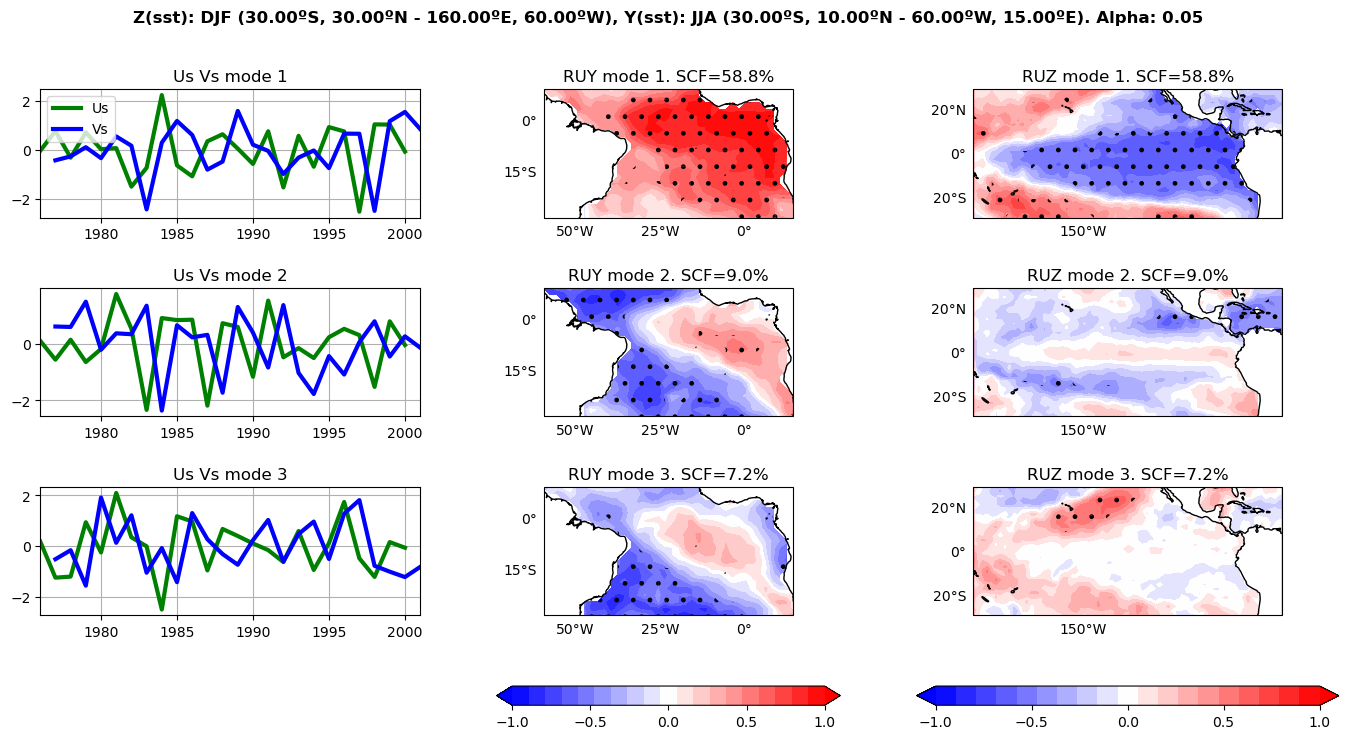

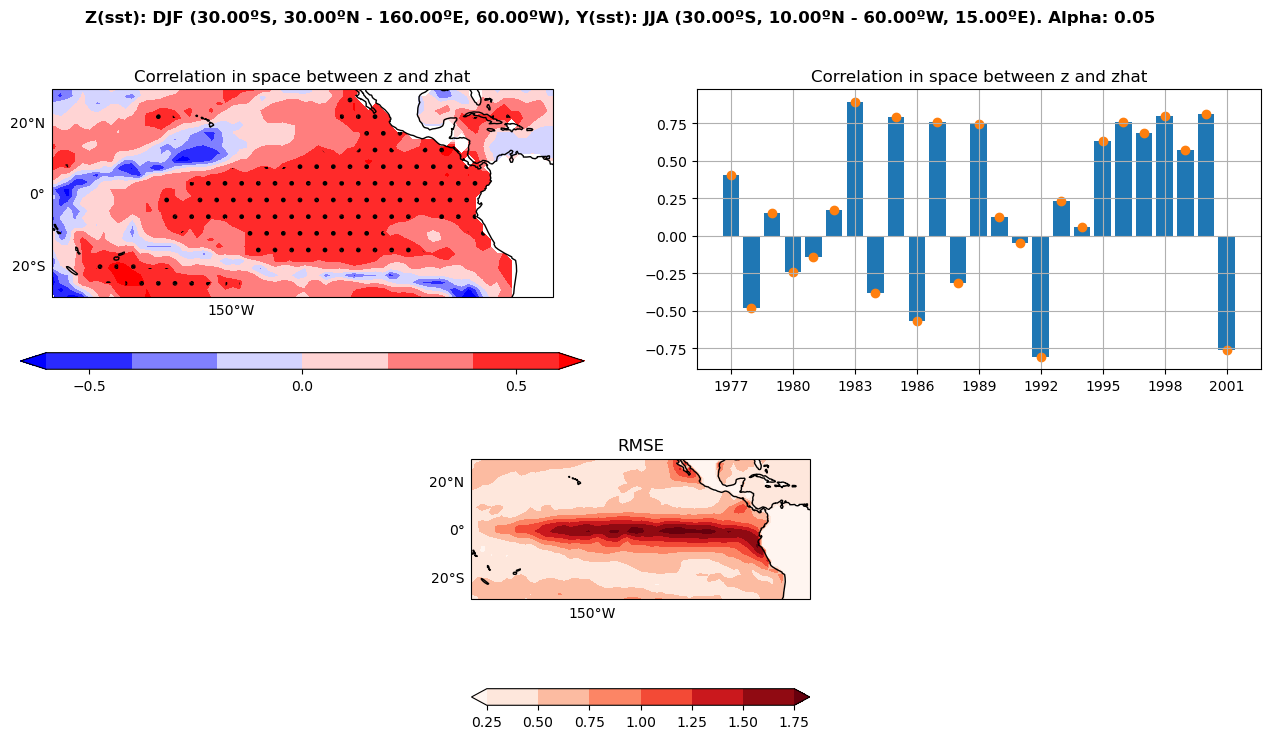

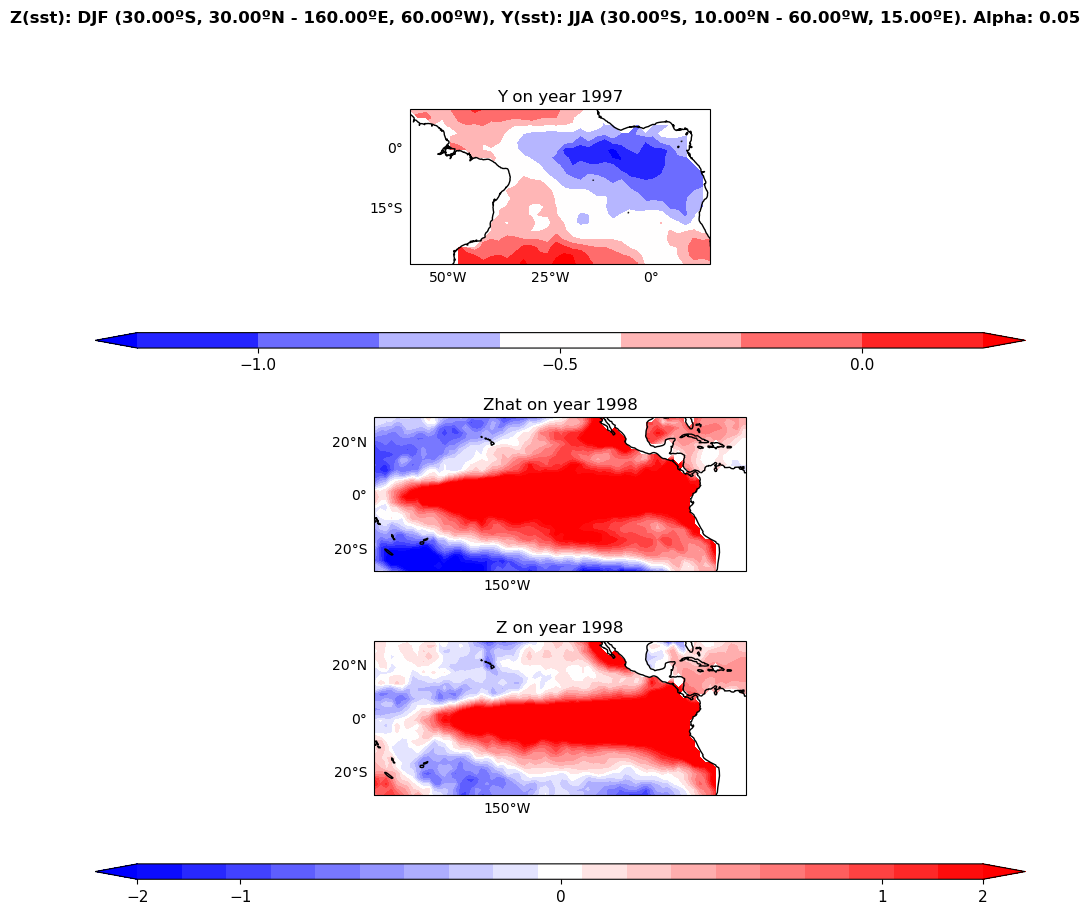

In [6]:
mca.plot(save_fig=True, name="mca.png", folder="./plots-EquatorialAtalantic_Impact_Nino/", ruy_ticks=[-1, -0.5, 0, 0.5, 1], ruz_ticks=[-1, -0.5, 0, 0.5, 1])
cross.plot(save_fig=True, name="cross.png", folder="./plots-EquatorialAtalantic_Impact_Nino/")
cross.plot_zhat(1998, figsize=(12, 10), save_fig=True, name="zhat_1998.png", folder="./plots-EquatorialAtalantic_Impact_Nino/", z_levels=np.linspace(-2, 2, 10), z_ticks=np.linspace(-2, 2, 5))

## Validation

In [7]:
from spy4cast.spy4cast import Validation

In [8]:
# To apply validation we first preprocess the training data
training_y = Preprocess(Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=10,
           lon0=-60, lonf=15,
           month0=Month.JUN, monthf=Month.AUG,
           year0=1976, yearf=2000),
    skip=1
), period=8, order=4)
training_z = Preprocess(Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-200, lonf=-60,
           month0=Month.DEC, monthf=Month.FEB,
           year0=1977, yearf=2001),
    skip=1
))
# Optionally save so that we save computing time for next runs
training_y.save("training_y_", "./data-EquatorialAtalantic_Impact_Nino/")
# training_y = Preprocess.load("training_y_", "./data/-EquatorialAtalantic_Impact_Nino")
training_z.save("training_z_", "./data-EquatorialAtalantic_Impact_Nino/")
# training_z = Preprocess.load("training_z_", "./data/-EquatorialAtalantic_Impact_Nino")

[INFO] Preprocessing data for variable sst took: 0.084 seconds
[INFO] Preprocessing data for variable sst took: 0.169 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/training_y_*.npy`
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/training_z_*.npy`


In [9]:
# Train the prediction model
training_mca = MCA(training_y, training_z, nm=6, alpha=0.05)
training_mca.save("training_mca_", "./data-EquatorialAtalantic_Impact_Nino/")
# training_mca = MCA.load("training_mca_", "./data-EquatorialAtalantic_Impact_Nino/", dsy=training_y, dsz=training_z)

[INFO] Applying MCA 
    Shapes: Z(2100, 25) 
            Y(760, 25) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
            Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
       Took: 1.011 seconds
[INFO] Saving MCA data in `./data-EquatorialAtalantic_Impact_Nino/training_mca_*.npy`


In [10]:
# We now validate agains the period from 2001 - 2020
validating_y = Preprocess(Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=10,
           lon0=-60, lonf=15,
           month0=Month.JUN, monthf=Month.AUG,
           year0=2001, yearf=2019),
    skip=1
), period=8, order=4)
validating_z = Preprocess(Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-200, lonf=-60,
           month0=Month.DEC, monthf=Month.FEB,
           year0=2002, yearf=2020),
    skip=1
))
# Optionally save so that we save computing time for next runs
validating_y.save("validating_y_", "./data-EquatorialAtalantic_Impact_Nino/")
# validating_y = Preprocess.load("training_y_", "./data/-EquatorialAtalantic_Impact_Nino")
validating_z.save("validating_z_", "./data-EquatorialAtalantic_Impact_Nino/")
# validating_z = Preprocess.load("validating_z_", "./data/-EquatorialAtalantic_Impact_Nino")

[INFO] Preprocessing data for variable sst took: 0.075 seconds
[INFO] Preprocessing data for variable sst took: 0.149 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/validating_y_*.npy`
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/validating_z_*.npy`


[INFO] Applying Validation
        Training
        ---------- 
        Shapes: Z(2100, 25) 
                Y(760, 25) 
        Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
                Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)
        
        Validation
        ---------- 
        Shapes: Z(2100, 19) 
                Y(760, 19) 
        Regions: Z DJF (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW) 
                Y JJA (30.00ºS, 10.00ºN - 60.00ºW, 15.00ºE)

	Took: 0.140 seconds
[INFO] Saving Validation data in `./data-EquatorialAtalantic_Impact_Nino/validation_z_*.npy`
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/validation.png
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/zhat_2016_validation.png


(<Figure size 700x800 with 6 Axes>,
 (<GeoAxes: title={'center': 'Y on year 2015'}>,
  <GeoAxes: title={'center': 'Zhat on year 2016'}>,
  <GeoAxes: title={'center': 'Z on year 2016'}>))

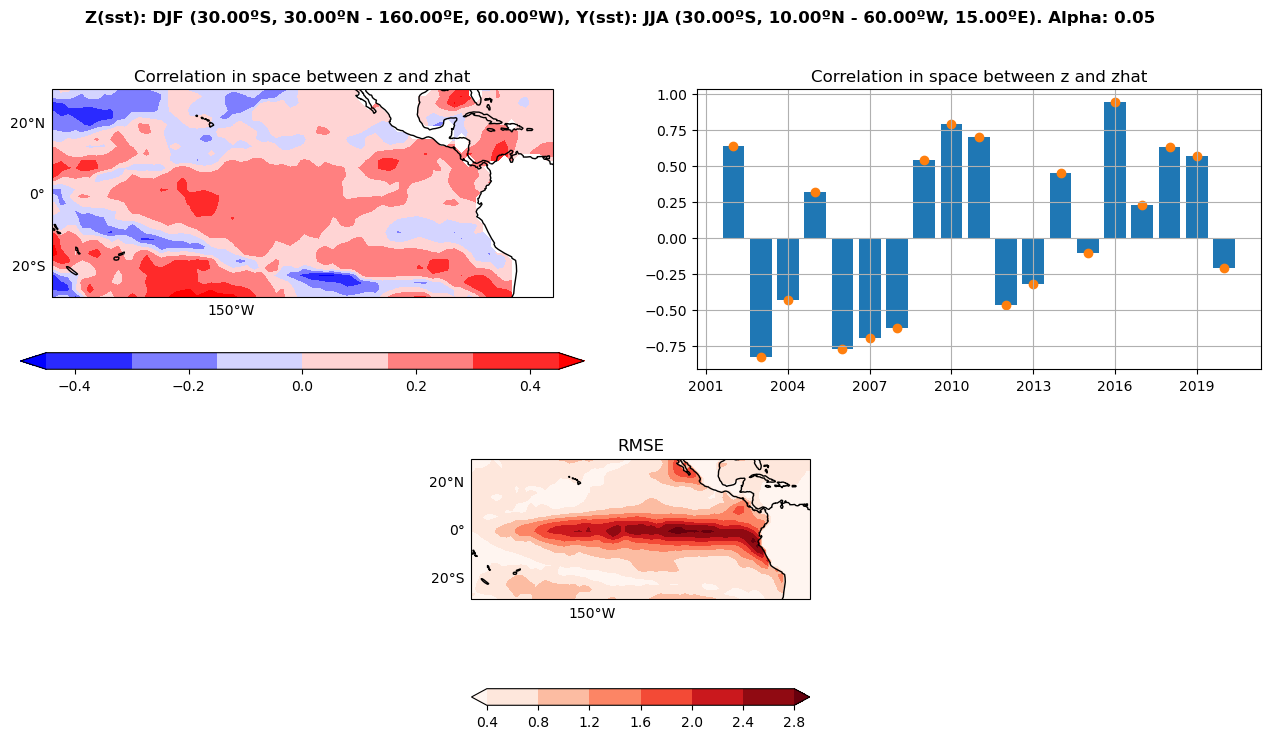

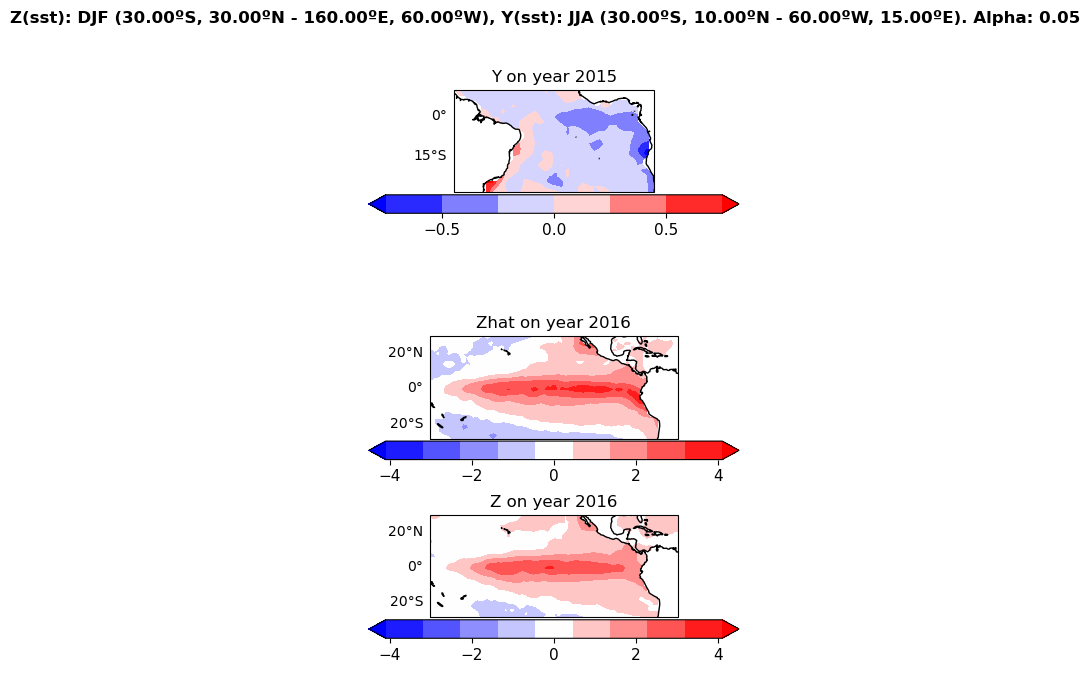

In [13]:
validation = Validation(training_mca, validating_y, validating_z)
validation.save("validation_z_", "./data-EquatorialAtalantic_Impact_Nino/")

validation.plot(save_fig=True, folder="./plots-EquatorialAtalantic_Impact_Nino/", name="validation.png", version='default')
validation.plot_zhat(2016, save_fig=True, folder="./plots-EquatorialAtalantic_Impact_Nino/", name="zhat_2016_validation.png", z_levels=np.linspace(-4.1, 4.1, 10))